In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
df = pd.read_csv("SeriesTemporais_Python/Download/Dados/italy_earthquakes_from_2016-08-24_to_2016-11-30.csv").set_index("Time")
df.index = pd.to_datetime(df.index)
df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [3]:
df.shape

(8086, 4)

In [4]:
df.describe()

,Latitude,Longitude,Depth/Km,Magnitude
count,8086.000000,8086.000000,8086.000000,8086.000000
mean,42.829557,13.161034,9.968328,2.398368
std,0.125927,0.083058,2.194064,0.426381
min,41.581300,12.537700,0.200000,2.000000
25%,42.751350,13.103200,8.900000,2.100000
50%,42.821800,13.160700,9.900000,2.300000
75%,42.911000,13.215650,10.800000,2.600000
max,43.927300,13.852500,47.900000,6.500000


Text(0, 0.5, 'Magnitude')

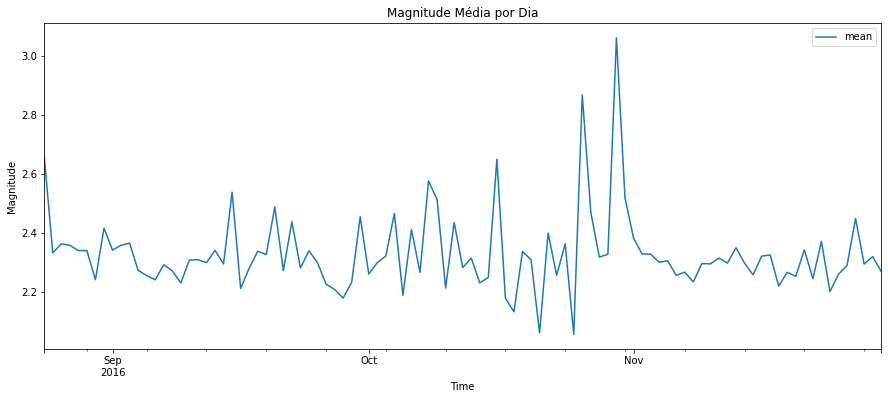

In [5]:
df['Magnitude'].resample('D').apply([np.mean]).plot()
plt.title('Magnitude Média por Dia')
plt.ylabel('Magnitude')

Text(0, 0.5, 'Magnitude')

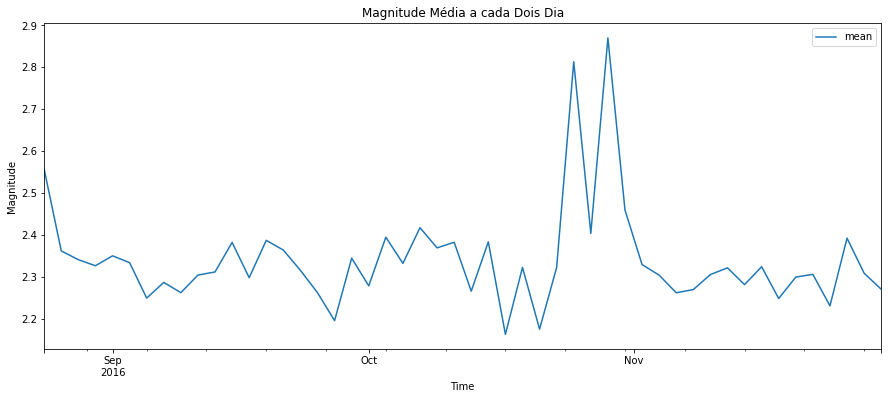

In [6]:
df['Magnitude'].resample('2D').apply([np.mean]).plot()
plt.title('Magnitude Média a cada Dois Dia')
plt.ylabel('Magnitude')

Text(0.5, 0, 'Tempo')

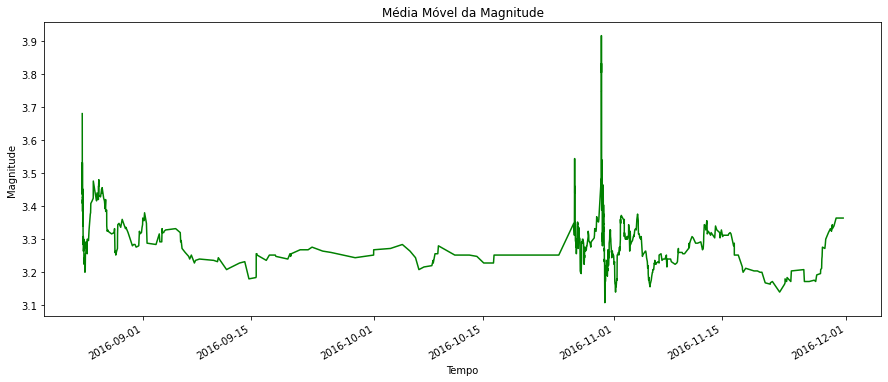

In [7]:
magn3 = df.loc[df['Magnitude'] >= 3.0, 'Magnitude']
pd.Series.rolling(magn3, window=25).mean().plot(style='-g')
plt.title('Média Móvel da Magnitude')
plt.ylabel('Magnitude')
plt.xlabel('Tempo')

In [8]:
magn3

Time
2016-08-24 03:36:32.000    6.0
2016-08-24 03:37:26.580    4.5
2016-08-24 03:40:46.590    3.8
2016-08-24 03:41:38.900    3.9
2016-08-24 03:42:07.170    3.6
                          ... 
2016-11-29 06:25:21.060    3.0
2016-11-29 06:49:56.730    3.1
2016-11-29 11:29:00.440    3.2
2016-11-29 18:14:02.690    4.4
2016-11-30 16:03:06.760    3.1
Name: Magnitude, Length: 888, dtype: float64